## Implementation of XOR gate

In [38]:
import keras
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

## Use one of the training sets: set 1 or set 2

In [39]:
# Training set 1
# This will be used to train the network

# Input to the gate
x_train = np.array([[0,0],[0,1],[1,0],[1,1]], "uint8") 

# Ouput of the gate, the truth value
y_train = np.array([[0],[1],[1],[0]], "uint8")

In [40]:
# Training set 2 
# Let us use real nos. instead of binary int values

# Input to the gate
x_train = np.random.uniform(low = 0, high = 1,size=400)
x_train = np.reshape(x_train, [-1,2])
print(x_train.shape)

# Output or truth values for inputs
y_train = np.zeros([x_train.shape[0]])
print(len(y_train))
for i in range(x_train.shape[0]):
    if x_train[i,0]>=0.5 and x_train[i,1]>=0.5:
        y_train[i]=0
    if x_train[i,0]>=0.5 and x_train[i,1]<0.5:
        y_train[i]=1
    if x_train[i,0]<0.5 and x_train[i,1]>=0.5:
        y_train[i]=1
    if x_train[i,0]<0.5 and x_train[i,1]<0.5:
        y_train[i]=0
        
# let's check the values in training set
print(x_train[:10])
print(y_train[:10])


(200, 2)
200
[[8.64569078e-02 5.30056840e-02]
 [9.18104389e-01 3.52762649e-01]
 [8.82297727e-01 8.67361873e-01]
 [2.10196101e-01 9.43256261e-04]
 [9.39159593e-01 5.04350942e-01]
 [5.26501405e-01 9.38948487e-01]
 [8.40647376e-01 4.09837948e-03]
 [3.38405546e-01 9.57031033e-01]
 [3.71187410e-01 6.32986320e-01]
 [1.33774393e-01 8.52362226e-01]]
[0. 1. 0. 0. 0. 0. 1. 1. 1. 1.]


## We will discuss two models for XOR and see the concept of linear separability

In [41]:
# Model 1: This model will not perform as desired

# Create neural networks model
# A sequential model is one where layers are stacked one
# after another and there is not skipping, feedback and
# distributed connection

model = Sequential()

# Add a single dense layer to the model
model.add(Dense(output_dim=1, activation='sigmoid', input_dim=2))      # first hidden layer
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


/home/fazy/anaconda2/envs/retnet/lib/python2.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, activation="sigmoid", input_dim=2)`
  # This is added back by InteractiveShellApp.init_path()


In [42]:
# Model 2: Observe why this model works better

# Create neural networks model
# A sequential model is one where layers are stacked one
# after another and there is not skipping, feedback and
# distributed connection

model = Sequential()

# Define the model layers
# Compare it will model 1
model.add(Dense(units=2,activation= 'sigmoid',input_dim=2))
model.add(Dense(units=1,activation='sigmoid'))

In [43]:
# Check the model summary

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Compile the neural networks model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [45]:
# Train the neural networks model

history = model.fit(x_train, y_train, nb_epoch=1000)

/home/fazy/anaconda2/envs/retnet/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/1000
200/200 [==============================] - 0s 954us/step - loss: 0.6952 - acc: 0.5150
Epoch 2/1000
200/200 [==============================] - 0s 58us/step - loss: 0.6952 - acc: 0.5150
Epoch 3/1000
200/200 [==============================] - 0s 43us/step - loss: 0.6951 - acc: 0.5150
Epoch 4/1000
200/200 [==============================] - 0s 61us/step - loss: 0.6951 - acc: 0.5150
Epoch 5/1000
200/200 [==============================] - 0s 49us/step - loss: 0.6950 - acc: 0.5150
Epoch 6/1000
200/200 [==============================] - 0s 72us/step - loss: 0.6949 - acc: 0.5150
Epoch 7/1000
200/200 [==============================] - 0s 81us/step - loss: 0.6949 - acc: 0.5150
Epoch 8/1000
200/200 [==============================] - 0s 93us/step - loss: 0.6949 - acc: 0.5150
Epoch 9/1000
200/200 [==============================] - 0s 65us/step - loss: 0.6948 - acc: 0.5150
Epoch 10/1000
200/200 [==============================] - 0s 75us/step - loss: 0.6949 - acc: 0.5150
Epoch 11/1000
200/

200/200 [==============================] - 0s 65us/step - loss: 0.6939 - acc: 0.5150
Epoch 84/1000
200/200 [==============================] - 0s 84us/step - loss: 0.6939 - acc: 0.5150
Epoch 85/1000
200/200 [==============================] - 0s 77us/step - loss: 0.6939 - acc: 0.5150
Epoch 86/1000
200/200 [==============================] - 0s 90us/step - loss: 0.6939 - acc: 0.5150
Epoch 87/1000
200/200 [==============================] - 0s 57us/step - loss: 0.6939 - acc: 0.5150
Epoch 88/1000
200/200 [==============================] - 0s 31us/step - loss: 0.6939 - acc: 0.5150
Epoch 89/1000
200/200 [==============================] - 0s 49us/step - loss: 0.6939 - acc: 0.5150
Epoch 90/1000
200/200 [==============================] - 0s 67us/step - loss: 0.6939 - acc: 0.5150
Epoch 91/1000
200/200 [==============================] - 0s 62us/step - loss: 0.6938 - acc: 0.5150
Epoch 92/1000
200/200 [==============================] - 0s 29us/step - loss: 0.6938 - acc: 0.5150
Epoch 93/1000
200/200 [=

200/200 [==============================] - 0s 50us/step - loss: 0.6933 - acc: 0.5150
Epoch 166/1000
200/200 [==============================] - 0s 50us/step - loss: 0.6933 - acc: 0.5150
Epoch 167/1000
200/200 [==============================] - 0s 32us/step - loss: 0.6933 - acc: 0.5150
Epoch 168/1000
200/200 [==============================] - 0s 59us/step - loss: 0.6933 - acc: 0.5150
Epoch 169/1000
200/200 [==============================] - 0s 37us/step - loss: 0.6933 - acc: 0.5150
Epoch 170/1000
200/200 [==============================] - 0s 50us/step - loss: 0.6933 - acc: 0.5150
Epoch 171/1000
200/200 [==============================] - 0s 55us/step - loss: 0.6933 - acc: 0.5150
Epoch 172/1000
200/200 [==============================] - 0s 60us/step - loss: 0.6933 - acc: 0.5150
Epoch 173/1000
200/200 [==============================] - 0s 44us/step - loss: 0.6933 - acc: 0.5150
Epoch 174/1000
200/200 [==============================] - 0s 51us/step - loss: 0.6933 - acc: 0.5150
Epoch 175/1000


200/200 [==============================] - 0s 87us/step - loss: 0.6928 - acc: 0.5150
Epoch 248/1000
200/200 [==============================] - 0s 64us/step - loss: 0.6928 - acc: 0.5150
Epoch 249/1000
200/200 [==============================] - 0s 125us/step - loss: 0.6928 - acc: 0.5150
Epoch 250/1000
200/200 [==============================] - 0s 88us/step - loss: 0.6928 - acc: 0.5150
Epoch 251/1000
200/200 [==============================] - 0s 100us/step - loss: 0.6928 - acc: 0.5150
Epoch 252/1000
200/200 [==============================] - 0s 86us/step - loss: 0.6928 - acc: 0.5150
Epoch 253/1000
200/200 [==============================] - 0s 100us/step - loss: 0.6928 - acc: 0.5150
Epoch 254/1000
200/200 [==============================] - 0s 85us/step - loss: 0.6928 - acc: 0.5150
Epoch 255/1000
200/200 [==============================] - 0s 98us/step - loss: 0.6927 - acc: 0.5150
Epoch 256/1000
200/200 [==============================] - 0s 91us/step - loss: 0.6928 - acc: 0.5150
Epoch 257/10

200/200 [==============================] - 0s 83us/step - loss: 0.6923 - acc: 0.5150
Epoch 329/1000
200/200 [==============================] - 0s 49us/step - loss: 0.6923 - acc: 0.5150
Epoch 330/1000
200/200 [==============================] - 0s 94us/step - loss: 0.6923 - acc: 0.5150
Epoch 331/1000
200/200 [==============================] - 0s 65us/step - loss: 0.6923 - acc: 0.5150
Epoch 332/1000
200/200 [==============================] - 0s 63us/step - loss: 0.6923 - acc: 0.5150
Epoch 333/1000
200/200 [==============================] - 0s 38us/step - loss: 0.6924 - acc: 0.5150
Epoch 334/1000
200/200 [==============================] - 0s 49us/step - loss: 0.6923 - acc: 0.5150
Epoch 335/1000
200/200 [==============================] - 0s 64us/step - loss: 0.6923 - acc: 0.5150
Epoch 336/1000
200/200 [==============================] - 0s 67us/step - loss: 0.6923 - acc: 0.5150
Epoch 337/1000
200/200 [==============================] - 0s 38us/step - loss: 0.6923 - acc: 0.5150
Epoch 338/1000


200/200 [==============================] - 0s 54us/step - loss: 0.6919 - acc: 0.5150
Epoch 411/1000
200/200 [==============================] - 0s 44us/step - loss: 0.6919 - acc: 0.5150
Epoch 412/1000
200/200 [==============================] - 0s 43us/step - loss: 0.6919 - acc: 0.5150
Epoch 413/1000
200/200 [==============================] - 0s 65us/step - loss: 0.6919 - acc: 0.5150
Epoch 414/1000
200/200 [==============================] - 0s 47us/step - loss: 0.6919 - acc: 0.5150
Epoch 415/1000
200/200 [==============================] - 0s 46us/step - loss: 0.6919 - acc: 0.5150
Epoch 416/1000
200/200 [==============================] - 0s 84us/step - loss: 0.6919 - acc: 0.5150
Epoch 417/1000
200/200 [==============================] - 0s 47us/step - loss: 0.6919 - acc: 0.5150
Epoch 418/1000
200/200 [==============================] - 0s 43us/step - loss: 0.6919 - acc: 0.5150
Epoch 419/1000
200/200 [==============================] - 0s 40us/step - loss: 0.6919 - acc: 0.5150
Epoch 420/1000


200/200 [==============================] - 0s 93us/step - loss: 0.6915 - acc: 0.5250
Epoch 492/1000
200/200 [==============================] - 0s 104us/step - loss: 0.6915 - acc: 0.5300
Epoch 493/1000
200/200 [==============================] - 0s 98us/step - loss: 0.6916 - acc: 0.5250
Epoch 494/1000
200/200 [==============================] - 0s 105us/step - loss: 0.6915 - acc: 0.5200
Epoch 495/1000
200/200 [==============================] - 0s 70us/step - loss: 0.6915 - acc: 0.5200
Epoch 496/1000
200/200 [==============================] - 0s 69us/step - loss: 0.6915 - acc: 0.5300
Epoch 497/1000
200/200 [==============================] - 0s 62us/step - loss: 0.6915 - acc: 0.5300
Epoch 498/1000
200/200 [==============================] - 0s 44us/step - loss: 0.6914 - acc: 0.5300
Epoch 499/1000
200/200 [==============================] - 0s 43us/step - loss: 0.6915 - acc: 0.5200
Epoch 500/1000
200/200 [==============================] - 0s 64us/step - loss: 0.6914 - acc: 0.5150
Epoch 501/100

200/200 [==============================] - 0s 67us/step - loss: 0.6911 - acc: 0.5800
Epoch 574/1000
200/200 [==============================] - 0s 62us/step - loss: 0.6911 - acc: 0.5800
Epoch 575/1000
200/200 [==============================] - 0s 44us/step - loss: 0.6911 - acc: 0.5800
Epoch 576/1000
200/200 [==============================] - 0s 61us/step - loss: 0.6911 - acc: 0.5800
Epoch 577/1000
200/200 [==============================] - 0s 63us/step - loss: 0.6911 - acc: 0.5800
Epoch 578/1000
200/200 [==============================] - 0s 55us/step - loss: 0.6911 - acc: 0.5800
Epoch 579/1000
200/200 [==============================] - 0s 35us/step - loss: 0.6911 - acc: 0.5950
Epoch 580/1000
200/200 [==============================] - 0s 58us/step - loss: 0.6911 - acc: 0.6100
Epoch 581/1000
200/200 [==============================] - 0s 51us/step - loss: 0.6911 - acc: 0.6250
Epoch 582/1000
200/200 [==============================] - 0s 67us/step - loss: 0.6911 - acc: 0.6300
Epoch 583/1000


200/200 [==============================] - 0s 72us/step - loss: 0.6907 - acc: 0.6250
Epoch 655/1000
200/200 [==============================] - 0s 38us/step - loss: 0.6907 - acc: 0.6250
Epoch 656/1000
200/200 [==============================] - 0s 46us/step - loss: 0.6908 - acc: 0.6300
Epoch 657/1000
200/200 [==============================] - 0s 87us/step - loss: 0.6907 - acc: 0.6400
Epoch 658/1000
200/200 [==============================] - 0s 87us/step - loss: 0.6907 - acc: 0.6350
Epoch 659/1000
200/200 [==============================] - 0s 78us/step - loss: 0.6907 - acc: 0.6300
Epoch 660/1000
200/200 [==============================] - 0s 90us/step - loss: 0.6907 - acc: 0.6300
Epoch 661/1000
200/200 [==============================] - 0s 55us/step - loss: 0.6907 - acc: 0.6250
Epoch 662/1000
200/200 [==============================] - 0s 55us/step - loss: 0.6907 - acc: 0.6200
Epoch 663/1000
200/200 [==============================] - 0s 50us/step - loss: 0.6907 - acc: 0.6300
Epoch 664/1000


Epoch 736/1000
200/200 [==============================] - 0s 112us/step - loss: 0.6904 - acc: 0.6850
Epoch 737/1000
200/200 [==============================] - 0s 106us/step - loss: 0.6903 - acc: 0.6850
Epoch 738/1000
200/200 [==============================] - 0s 107us/step - loss: 0.6903 - acc: 0.6900
Epoch 739/1000
200/200 [==============================] - 0s 88us/step - loss: 0.6903 - acc: 0.6800
Epoch 740/1000
200/200 [==============================] - 0s 69us/step - loss: 0.6903 - acc: 0.6750
Epoch 741/1000
200/200 [==============================] - 0s 75us/step - loss: 0.6903 - acc: 0.6750
Epoch 742/1000
200/200 [==============================] - 0s 111us/step - loss: 0.6903 - acc: 0.6750
Epoch 743/1000
200/200 [==============================] - 0s 97us/step - loss: 0.6903 - acc: 0.6750
Epoch 744/1000
200/200 [==============================] - 0s 79us/step - loss: 0.6903 - acc: 0.6750
Epoch 745/1000
200/200 [==============================] - 0s 83us/step - loss: 0.6903 - acc: 0.6

200/200 [==============================] - 0s 74us/step - loss: 0.6899 - acc: 0.6700
Epoch 818/1000
200/200 [==============================] - 0s 85us/step - loss: 0.6899 - acc: 0.6800
Epoch 819/1000
200/200 [==============================] - 0s 61us/step - loss: 0.6899 - acc: 0.6750
Epoch 820/1000
200/200 [==============================] - 0s 63us/step - loss: 0.6899 - acc: 0.6850
Epoch 821/1000
200/200 [==============================] - 0s 66us/step - loss: 0.6899 - acc: 0.6900
Epoch 822/1000
200/200 [==============================] - 0s 65us/step - loss: 0.6899 - acc: 0.6900
Epoch 823/1000
200/200 [==============================] - 0s 40us/step - loss: 0.6899 - acc: 0.6800
Epoch 824/1000
200/200 [==============================] - 0s 50us/step - loss: 0.6899 - acc: 0.6750
Epoch 825/1000
200/200 [==============================] - 0s 64us/step - loss: 0.6898 - acc: 0.6750
Epoch 826/1000
200/200 [==============================] - 0s 62us/step - loss: 0.6898 - acc: 0.6750
Epoch 827/1000


200/200 [==============================] - 0s 75us/step - loss: 0.6894 - acc: 0.6950
Epoch 899/1000
200/200 [==============================] - 0s 74us/step - loss: 0.6894 - acc: 0.7050
Epoch 900/1000
200/200 [==============================] - 0s 54us/step - loss: 0.6894 - acc: 0.6950
Epoch 901/1000
200/200 [==============================] - 0s 51us/step - loss: 0.6894 - acc: 0.7000
Epoch 902/1000
200/200 [==============================] - 0s 119us/step - loss: 0.6894 - acc: 0.7000
Epoch 903/1000
200/200 [==============================] - 0s 70us/step - loss: 0.6894 - acc: 0.7050
Epoch 904/1000
200/200 [==============================] - 0s 47us/step - loss: 0.6895 - acc: 0.6950
Epoch 905/1000
200/200 [==============================] - 0s 41us/step - loss: 0.6894 - acc: 0.6900
Epoch 906/1000
200/200 [==============================] - 0s 64us/step - loss: 0.6894 - acc: 0.6950
Epoch 907/1000
200/200 [==============================] - 0s 65us/step - loss: 0.6894 - acc: 0.7050
Epoch 908/1000

Epoch 980/1000
200/200 [==============================] - 0s 73us/step - loss: 0.6889 - acc: 0.7000
Epoch 981/1000
200/200 [==============================] - 0s 61us/step - loss: 0.6889 - acc: 0.7050
Epoch 982/1000
200/200 [==============================] - 0s 68us/step - loss: 0.6889 - acc: 0.7050
Epoch 983/1000
200/200 [==============================] - 0s 49us/step - loss: 0.6889 - acc: 0.7050
Epoch 984/1000
200/200 [==============================] - 0s 70us/step - loss: 0.6889 - acc: 0.7000
Epoch 985/1000
200/200 [==============================] - 0s 64us/step - loss: 0.6889 - acc: 0.6900
Epoch 986/1000
200/200 [==============================] - 0s 43us/step - loss: 0.6889 - acc: 0.6900
Epoch 987/1000
200/200 [==============================] - 0s 46us/step - loss: 0.6889 - acc: 0.6800
Epoch 988/1000
200/200 [==============================] - 0s 56us/step - loss: 0.6889 - acc: 0.6750
Epoch 989/1000
200/200 [==============================] - 0s 67us/step - loss: 0.6889 - acc: 0.6750


In [46]:
# Let's plot some graphs to see how training went by

history.history.keys()

['acc', 'loss']

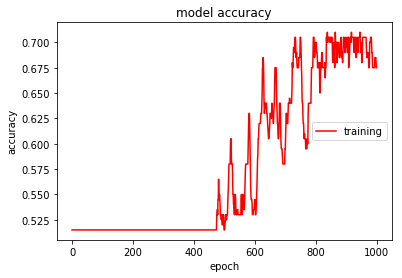

In [47]:
# Behaviour of accuracy over the epochs

plt.plot(history.history['acc'],'r')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training'], loc='center right')
plt.show()

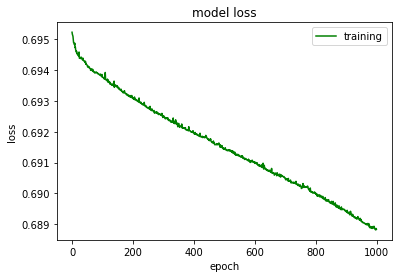

In [48]:
# Behviour of loss over the epochs

plt.plot(history.history['loss'],'g')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training'], loc='upper right')
plt.show()

In [50]:
# Let's do some prediction

test = np.array([[0.1,0.7]])
model.predict(test,batch_size=1)

array([[0.50989294]], dtype=float32)